<a href="https://colab.research.google.com/github/RFJC21/ANN_Multiclass_Classification/blob/master/Flower_Multiclass_Classification_Deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [4]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['iris.csv']))
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
#.values because of the validation data
X=df.drop('species',axis=1).values
y=df['species'].values

In [0]:
#encoder

In [0]:
from sklearn.preprocessing import LabelBinarizer

In [0]:
encoder=LabelBinarizer()

In [0]:
y=encoder.fit_transform(y)

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

In [0]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [0]:
# tipicaly, number of neurons (units) -> number of features, neste caso 30

model=Sequential()

model.add(Dense(4, activation='relu',input_shape=[4,]))
model.add(Dense(3, activation='softmax'))
#3 because we jave 3 classes of flowers, and softmax because it is a mukticlass clasification

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop=EarlyStopping(patience=10)

In [17]:
# also pass Validation Data -> after every epoch on trainning in the training data, it runs on the test data anc check the loss on the test data
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),callbacks=[early_stop],epochs=300)

Epoch 1/300
4/4 [==============================] - 0s 47ms/step - loss: 1.0822 - accuracy: 0.3393 - val_loss: 1.1827 - val_accuracy: 0.2632
Epoch 2/300
4/4 [==============================] - 0s 9ms/step - loss: 1.1013 - accuracy: 0.3393 - val_loss: 1.1775 - val_accuracy: 0.2895
Epoch 3/300
4/4 [==============================] - 0s 8ms/step - loss: 1.0786 - accuracy: 0.3393 - val_loss: 1.1716 - val_accuracy: 0.2895
Epoch 4/300
4/4 [==============================] - 0s 9ms/step - loss: 1.0845 - accuracy: 0.3393 - val_loss: 1.1667 - val_accuracy: 0.2895
Epoch 5/300
4/4 [==============================] - 0s 9ms/step - loss: 1.0758 - accuracy: 0.3393 - val_loss: 1.1618 - val_accuracy: 0.2895
Epoch 6/300
4/4 [==============================] - 0s 8ms/step - loss: 1.0636 - accuracy: 0.3393 - val_loss: 1.1578 - val_accuracy: 0.2895
Epoch 7/300
4/4 [==============================] - 0s 9ms/step - loss: 1.0662 - accuracy: 0.3393 - val_loss: 1.1539 - val_accuracy: 0.3158
Epoch 8/300
4/4 [=========

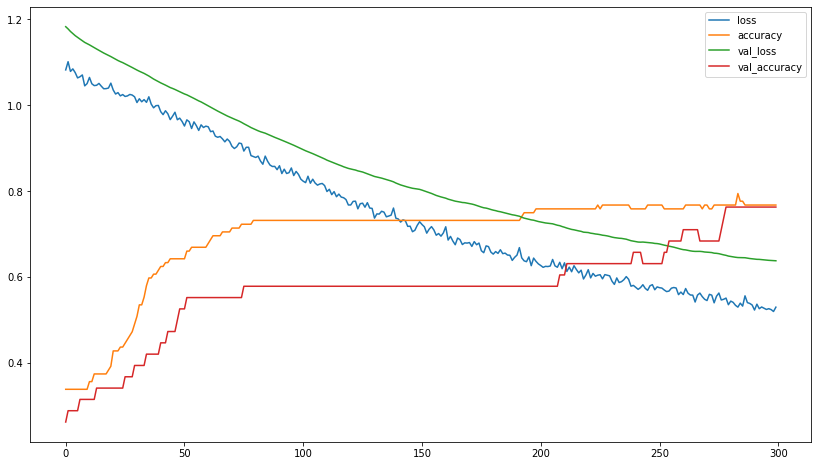

In [18]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(14,8))

In [19]:
loss_df

,loss,accuracy,val_loss,val_accuracy
0,1.082183,0.339286,1.182687,0.263158
1,1.101260,0.339286,1.177516,0.289474
2,1.078628,0.339286,1.171563,0.289474
3,1.084524,0.339286,1.166714,0.289474
4,1.075846,0.339286,1.161832,0.289474
...,...,...,...,...
295,0.524995,0.767857,0.640016,0.763158
296,0.526818,0.767857,0.639264,0.763158
297,0.524643,0.767857,0.638919,0.763158
298,0.520274,0.767857,0.638382,0.763158


# Evaluate

In [20]:
predictions=model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [21]:
predictions

array([0, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 0,
       1, 2, 2, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 2, 2, 2])

In [22]:
model.evaluate(X_test,y_test,verbose=0)

[0.638231098651886, 0.7631579041481018]

# Define model to deployment

In [23]:
epochs=len(loss_df)
epochs

300

In [0]:
X_test=scaler.fit_transform(X)

In [0]:
# tipicaly, number of neurons (units) -> number of features, neste caso 30

model=Sequential()

model.add(Dense(4, activation='relu',input_shape=[4,]))
model.add(Dense(3, activation='softmax'))
#3 because we jave 3 classes of flowers, and softma because it is a mukticlass clasification

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
# also pass Validation Data -> after every epoch on trainning in the training data, it runs on the test data anc check the loss on the test data
model.fit(X_test,y,epochs=epochs)

Epoch 1/300
5/5 [==============================] - 0s 2ms/step - loss: 1.0991 - accuracy: 0.0400
Epoch 2/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0963 - accuracy: 0.0467
Epoch 3/300
5/5 [==============================] - 0s 2ms/step - loss: 1.0929 - accuracy: 0.1200
Epoch 4/300
5/5 [==============================] - 0s 2ms/step - loss: 1.0905 - accuracy: 0.2000
Epoch 5/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0880 - accuracy: 0.2667
Epoch 6/300
5/5 [==============================] - 0s 2ms/step - loss: 1.0856 - accuracy: 0.3400
Epoch 7/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0821 - accuracy: 0.4200
Epoch 8/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0810 - accuracy: 0.4600
Epoch 9/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0782 - accuracy: 0.4933
Epoch 10/300
5/5 [==============================] - 0s 2ms/step - loss: 1.0754 - accuracy: 0.5400
Epoch 11/300
5/5 [===========

In [0]:
#save model and scaler
model.save("final_iris_model.h5")

In [0]:
import joblib

In [29]:
joblib.dump(scaler,'iris-scaler.pkl')

['iris-scaler.pkl']

In [0]:
from tensorflow.keras.models import load_model

In [0]:
flower_model=load_model('final_iris_model.h5')

In [0]:
flower_scaler=joblib.load('iris-scaler.pkl')

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()                       
drive = GoogleDrive(gauth)

In [0]:
model.save('iris_test.h5')
model_file = drive.CreateFile({'title' : 'iris_test.h5'})                       
model_file.SetContentFile('iris_test.h5')                       
model_file.Upload()

In [0]:
# download to google drive                      
 drive.CreateFile({'id': model_file.get('id')})

In [0]:
file_obj = drive.CreateFile({'id': '1GvZEWn-yMGRwaLwkzVxgErHwR9PXXuo8'})                       
file_obj.GetContentFile('keras.h5')

In [0]:
flower_model_2=load_model('iris_test.h5')

# We need a function to acept data

In [0]:
encoder.classes_

In [0]:
df.head()

In [0]:
def return_prediction(model,scaler,sample_json):


    s_len=sample_json['sepal_lenght']
    s_wid=sample_json['sepal_width']
    p_len=sample_json['petal_lenght']
    p_wid=sample_json['petal_width']

    flower=[[s_len,s_wid,p_len,p_wid]]

    classes=np.array(['setosa', 'versicolor', 'virginica'])

    flower=scaler.transform(flower)

    class_ind=model.predict_classes(flower)[0]

    return classes[class_ind]

# Code for deployment

In [0]:
from tensorflow.keras.models import load_model
import joblib
import numpy as np

flower_model_2=load_model('iris_test.h5')
flower_scaler=joblib.load('iris-scaler.pkl')

def return_prediction(model,scaler,sample_json):


    s_len=sample_json['sepal_lenght']
    s_wid=sample_json['sepal_width']
    p_len=sample_json['petal_lenght']
    p_wid=sample_json['petal_width']

    flower=[[s_len,s_wid,p_len,p_wid]]

    classes=np.array(['setosa', 'versicolor', 'virginica'])

    flower=scaler.transform(flower)

    class_ind=model.predict_classes(flower)[0]

    return classes[class_ind]